In [ ]:
#hide
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [ ]:
from fastbook import *
from fastai.vision.widgets import *

In [ ]:
!pip install duckduckgo_search
from duckduckgo_search import DDGS
import requests

def download_images(query, max_results=20):
    with DDGS() as ddgs:
        results = ddgs.images(query, max_results=max_results)
        for i, r in enumerate(results):
            img_data = requests.get(r['image']).content
            with open(f'image_{i}.jpg', 'wb') as handler:
                handler.write(img_data)

download_images("grizzly bear", max_results=10)


/tmp/ipython-input-339607490.py:6: RuntimeWarning: This package (`duckduckgo_search`) has been renamed to `ddgs`! Use `pip install ddgs` instead.
  with DDGS() as ddgs:


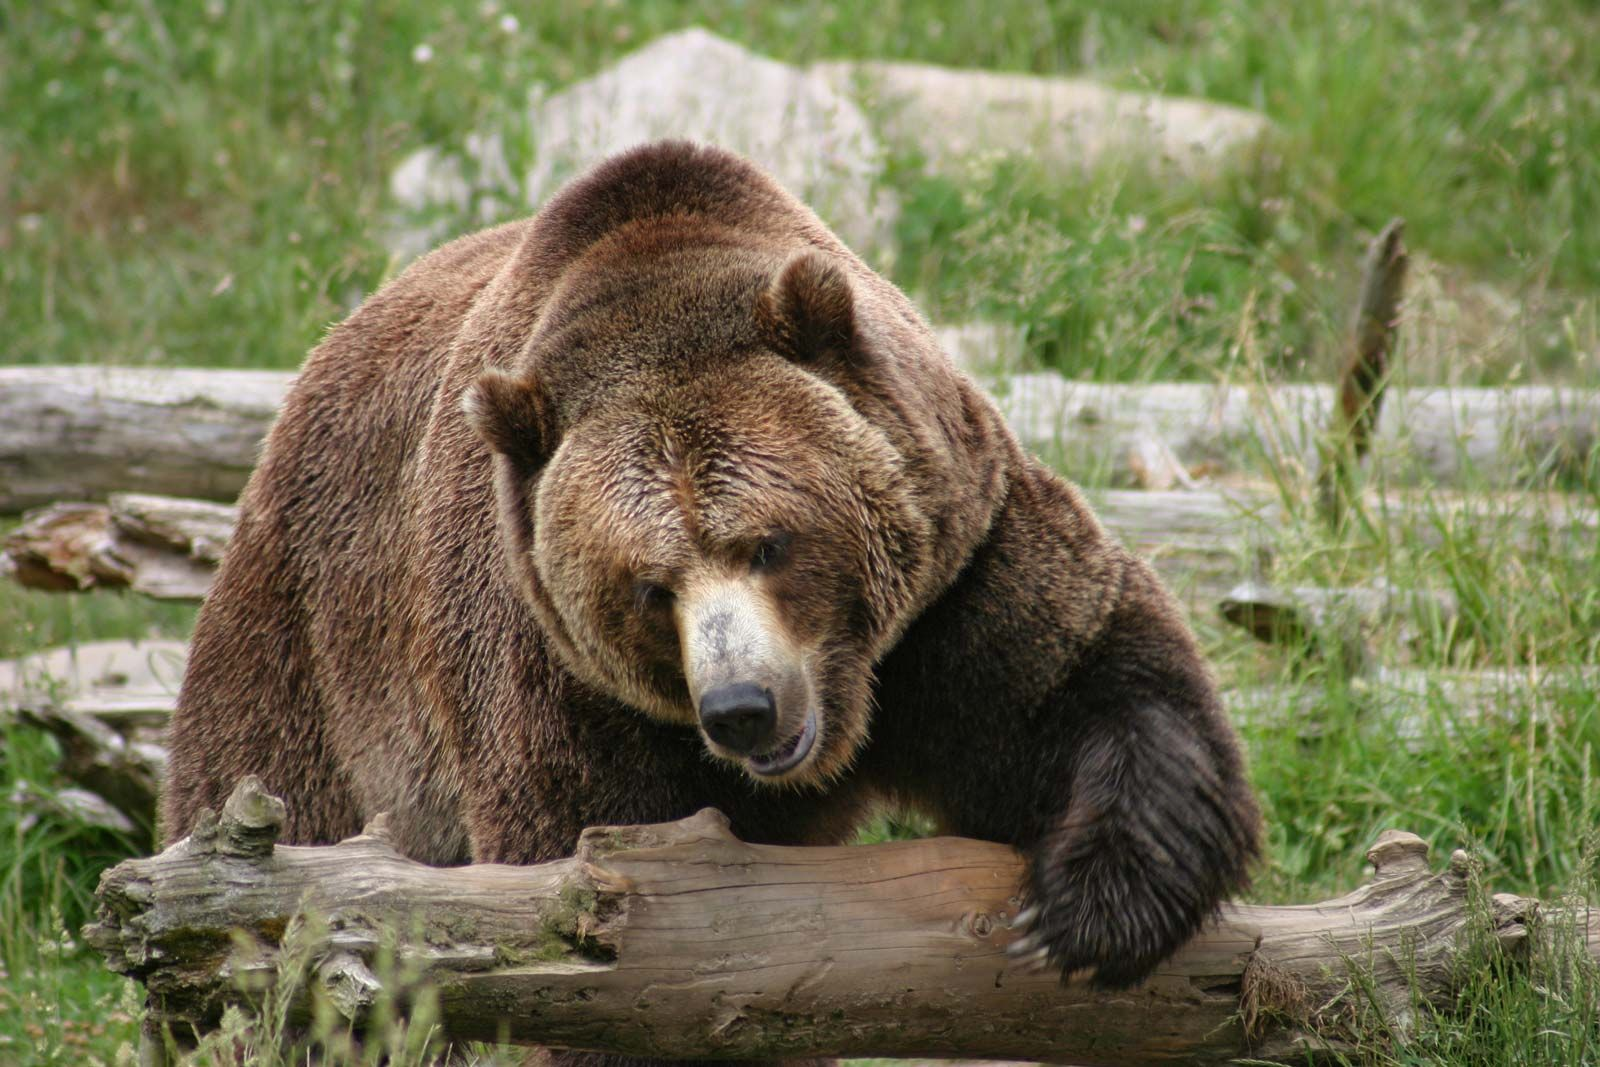

In [ ]:
from IPython.display import Image as IPyImage
IPyImage(filename='image_0.jpg')

In [ ]:
!pip install ducduckgo_search fastai --quiet

from duckduckgo_search import DDGS
from fastai.vision.all import *
from pathlib import Path

bear_types = 'grizzly', 'black', 'teddy'
path = Path('bears')

if not path.exists():
  path.mkdir()
  for o in bear_types:
    dest = path/o
    dest.mkdir(exist_ok=True)

    print(f"Searching for {o} bear....")
    with DDGS() as ddgs:
      results = ddgs.images(f'{o} bear', max_results=50)
      urls = [r['image'] for r in results]

    download_images(dest, urls=urls)
    failed = verify_images(get_image_files(dest))
    failed.map(Path.unlink)


ERROR: Could not find a version that satisfies the requirement ducduckgo_search (from versions: none)
ERROR: No matching distribution found for ducduckgo_search


In [ ]:
fns = get_image_files(path)
fns

(#137) [Path('bears/teddy/9be8bf84-2902-47af-8006-2f92c35a2a3d.jpg'),Path('bears/teddy/40ccd2fb-86e7-4345-b635-a1865c3636db.jpg'),Path('bears/teddy/a102d6a9-31ce-4676-b254-e6e0f2eb25f3.jpg'),Path('bears/teddy/ed36cfb7-fa3e-4e9b-8d26-c6147692d0e0.jpg'),Path('bears/teddy/72093346-8fd8-4e9b-bea9-8d56e43faf05.jpg'),Path('bears/teddy/ede89b83-76c3-4c35-8af5-5d699e94e528.jpg'),Path('bears/teddy/7fb82a4f-c7a7-4b97-a3d8-7e17f524aa52.jpg'),Path('bears/teddy/b4ff5969-6bff-4900-901f-c54225bde478.jpg'),Path('bears/teddy/6347e1aa-6203-46ff-8343-f0c2b6e67541.jpg'),Path('bears/teddy/f7039967-c3df-4af4-845e-74ef5011ab31.jpg'),Path('bears/teddy/4463d900-c4a4-4d57-8cdb-2761ef249669.jpeg'),Path('bears/teddy/e8ab4bd4-8137-4d39-8087-9d4f1246e9e6.jpg'),Path('bears/teddy/012e45ec-b986-4a9d-a50b-77ebf4d1e51e.png'),Path('bears/teddy/1d71bce0-ef1c-4c53-ad04-3cb980815e35.jpg'),Path('bears/teddy/825dceb4-3d2a-4b40-bad7-6a4e2bb05132.png'),Path('bears/teddy/0b96dc2b-c06d-4f13-8f00-7582b909a862.jpg'),Path('bears/ted

In [ ]:
bears = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct = 0.2, seed=42),
    get_y = parent_label,
    item_tfms = Resize(128))

In [ ]:
dls = bears.dataloaders(path)

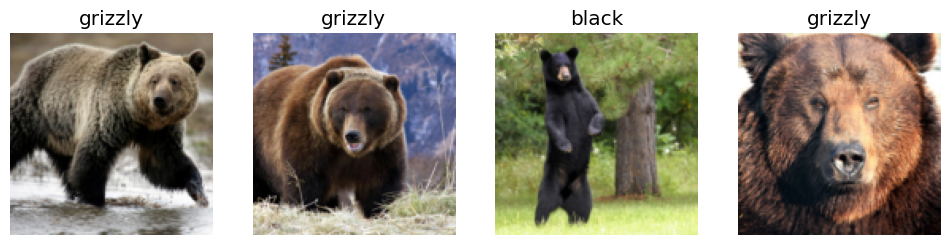

In [ ]:
dls.valid.show_batch(max_n = 4, nrows = 1)

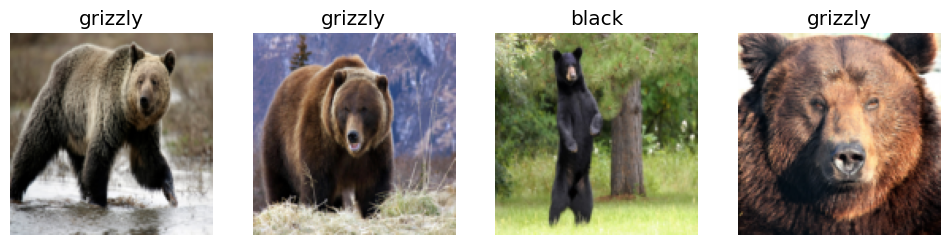

In [ ]:
bears = bears.new(item_tfms = Resize(128, ResizeMethod.Squish))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows = 1)

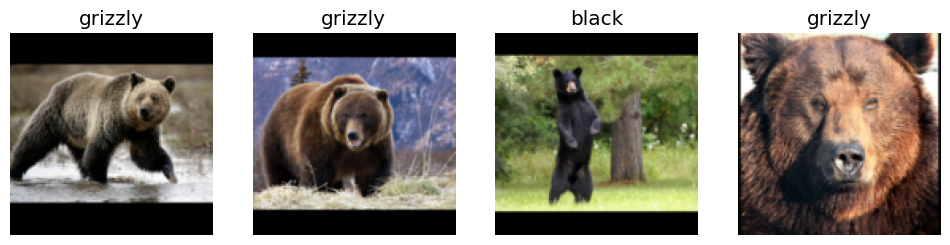

In [ ]:
bears = bears.new(item_tfms = Resize(128, ResizeMethod.Pad, pad_mode = 'zeros'))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n =4, nrows = 1)

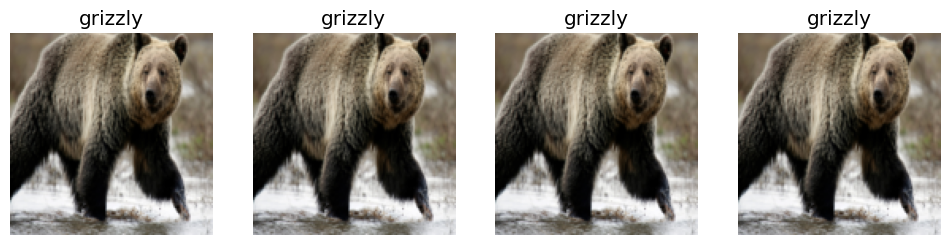

In [ ]:
bears = bears.new(item_tfms=RandomResizedCrop(128, min_scale= 0.3))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n =4, nrows = 1, unique=True)

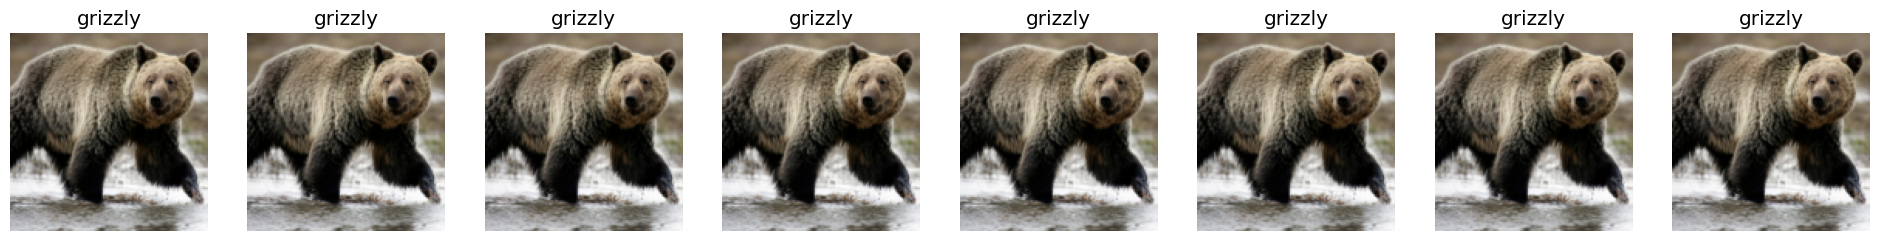

In [ ]:
bears = bears.new(item_tfms=Resize(128),batch_tfms= aug_transforms(mult = 2))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n =8, nrows = 1, unique=True)

In [ ]:
bears = bears.new(
    item_tfms= RandomResizedCrop(224, min_scale = 0.5),
    batch_tfms = aug_transforms())
dls = bears.dataloaders(path)

In [ ]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

/usr/lib/python3.11/multiprocessing/popen_fork.py:66: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x7a74f68e7b60>
  self.pid = os.fork()
/usr/lib/python3.11/multiprocessing/popen_fork.py:66: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x7a74f68e7cb0>
  self.pid = os.fork()
/usr/lib/python3.11/multiprocessing/popen_fork.py:66: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x7a74f68e7b60>
  self.pid = os.fork()
/usr/lib/python3.11/multiprocessing/popen_fork.py:66: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x7a74f68e7cb0>
  self.pid = os.fork()
/usr/lib/python3.11/multiprocessing/popen_fork.py:66: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x7a74f68e7b60>
  self.pid = os.fork()
/usr/lib/python3.11/multiprocessing/popen_fork.py:66: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x7a74f68e7cb0>
  self.pid = os.fork()
/usr/lib/python3.11/multiprocessing/popen_fork.py:66: ResourceWarning: Unclosed socket <zmq.So

/usr/lib/python3.11/multiprocessing/popen_fork.py:66: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x7a74f68e7b60>
  self.pid = os.fork()
/usr/lib/python3.11/multiprocessing/popen_fork.py:66: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x7a74f68e7cb0>
  self.pid = os.fork()
/usr/lib/python3.11/multiprocessing/popen_fork.py:66: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x7a74f68e7b60>
  self.pid = os.fork()
/usr/lib/python3.11/multiprocessing/popen_fork.py:66: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x7a74f68e7cb0>
  self.pid = os.fork()
/usr/lib/python3.11/multiprocessing/popen_fork.py:66: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x7a74f68e7b60>
  self.pid = os.fork()
/usr/lib/python3.11/multiprocessing/popen_fork.py:66: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x7a74f68e7cb0>
  self.pid = os.fork()
/usr/lib/python3.11/multiprocessing/popen_fork.py:66: ResourceWarning: Unclosed socket <zmq.So

These 'Resource warnings'  aren’t fastai-specific at all. They’re Python ResourceWarnings coming from Colab’s multiprocessing when your DataLoaders are using multiple workers (num_workers > 0).

It basically means:

    *“Hey, a background worker or socket wasn’t closed before the process ended. I’m telling you in case it’s a memory leak… but it’s probably just cleanup timing in Colab.”*

In [ ]:
# 📌 Put this at the top of your training cell
from IPython.display import clear_output
import warnings

# 1. Clear any logs from earlier cells
clear_output()

# 2. Suppress ResourceWarnings and other common harmless warnings
warnings.filterwarnings("ignore", category=ResourceWarning)
warnings.filterwarnings("ignore", category=UserWarning)  # optional

# 3. Train your model
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)



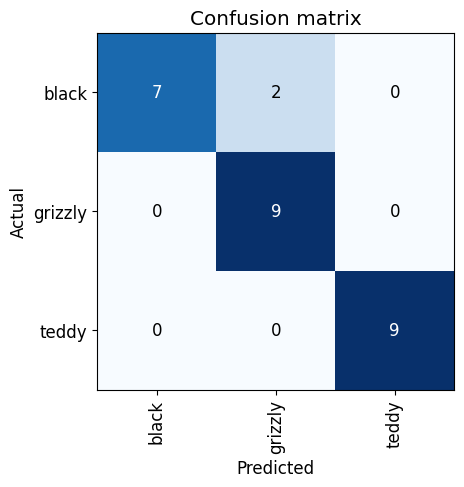

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

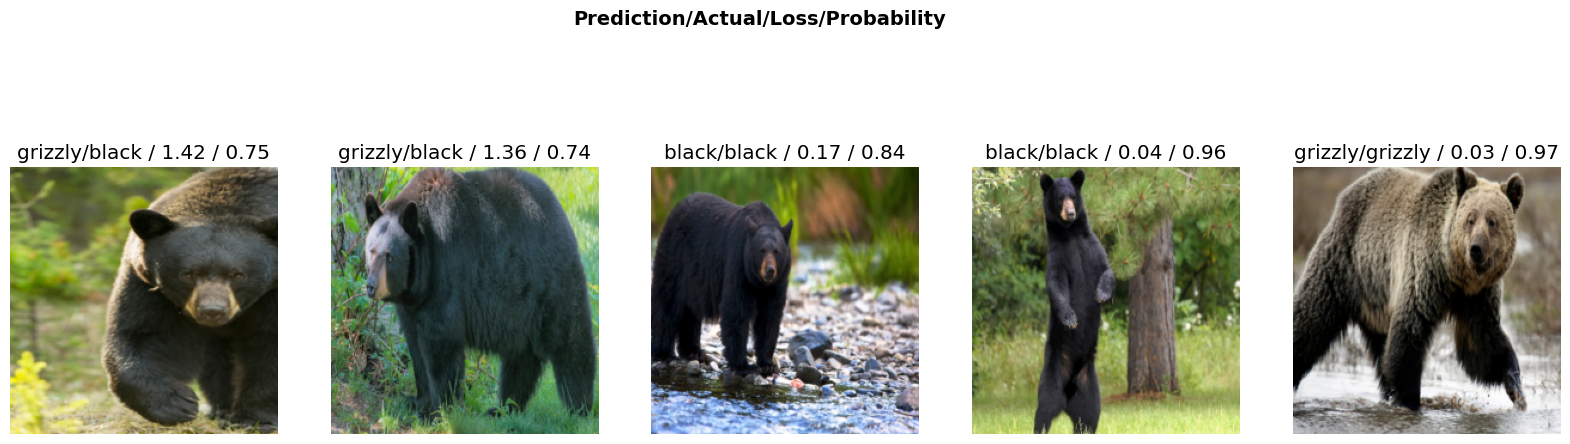

In [ ]:
interp.plot_top_losses(5, nrows=1,figsize=(20,6))

In [ ]:
cleaner = ImageClassifierCleaner(learn)
cleaner

In [ ]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()

In [ ]:
for idx, cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

In [ ]:
# Load your exported model
learn_inf = load_learner('export.pkl')

# Pick one of the images you downloaded
img_path = fns[0]  # for example, the first image
pred_class, pred_idx, probs = learn_inf.predict(img_path)

print(f"Prediction: {pred_class}")
print(f"Probability: {probs[pred_idx]:.4f}")


Prediction: teddy
Probability: 1.0000


In [ ]:
learn_inf.dls.vocab

['black', 'grizzly', 'teddy']

In [ ]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [ ]:
img = PILImage.create(btn_upload.data[-1])

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128, 128))
out_pl

Output()

In [ ]:
 #Step 1: create the label widget (before prediction)
label_pred = widgets.Label(value='Prediction will appear here')

In [ ]:
btn_run = widgets.Button(description="Classify")

In [ ]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    label_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [ ]:
btn_upload = widgets.FileUpload()

In [ ]:
VBox([widgets.Label('Select your bear!'),
      btn_upload, btn_run, out_pl, label_pred])


In [1]:
!pip install voila
!jupyter serverextension enable --sys-prefix voila

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 44.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.1/106.1 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.9/386.9 kB 22.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.7/59.7 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 kB 3.3 MB/s eta 0:00:00
  Attempting uninstall: jupyter-client
    Found existing installation: jupyter-client 6.1.12
    Uninstalling jupyter-client-6.1.12:
      Successfully uninstalled jupyter-client-6.1.12
  Attempting uninstall: jupyter-server
    Found existing installation: jupyter-server 1.16.0
    Uninstalling jupyter-server-1.16.0:
      Successfully uninstalled jupyter-server-1.16.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following